In [1]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Loyalty
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,1
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,4
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,4
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,4
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,4


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [3]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,3.068278
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.993292
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [4]:
data['Class'].value_counts()

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64

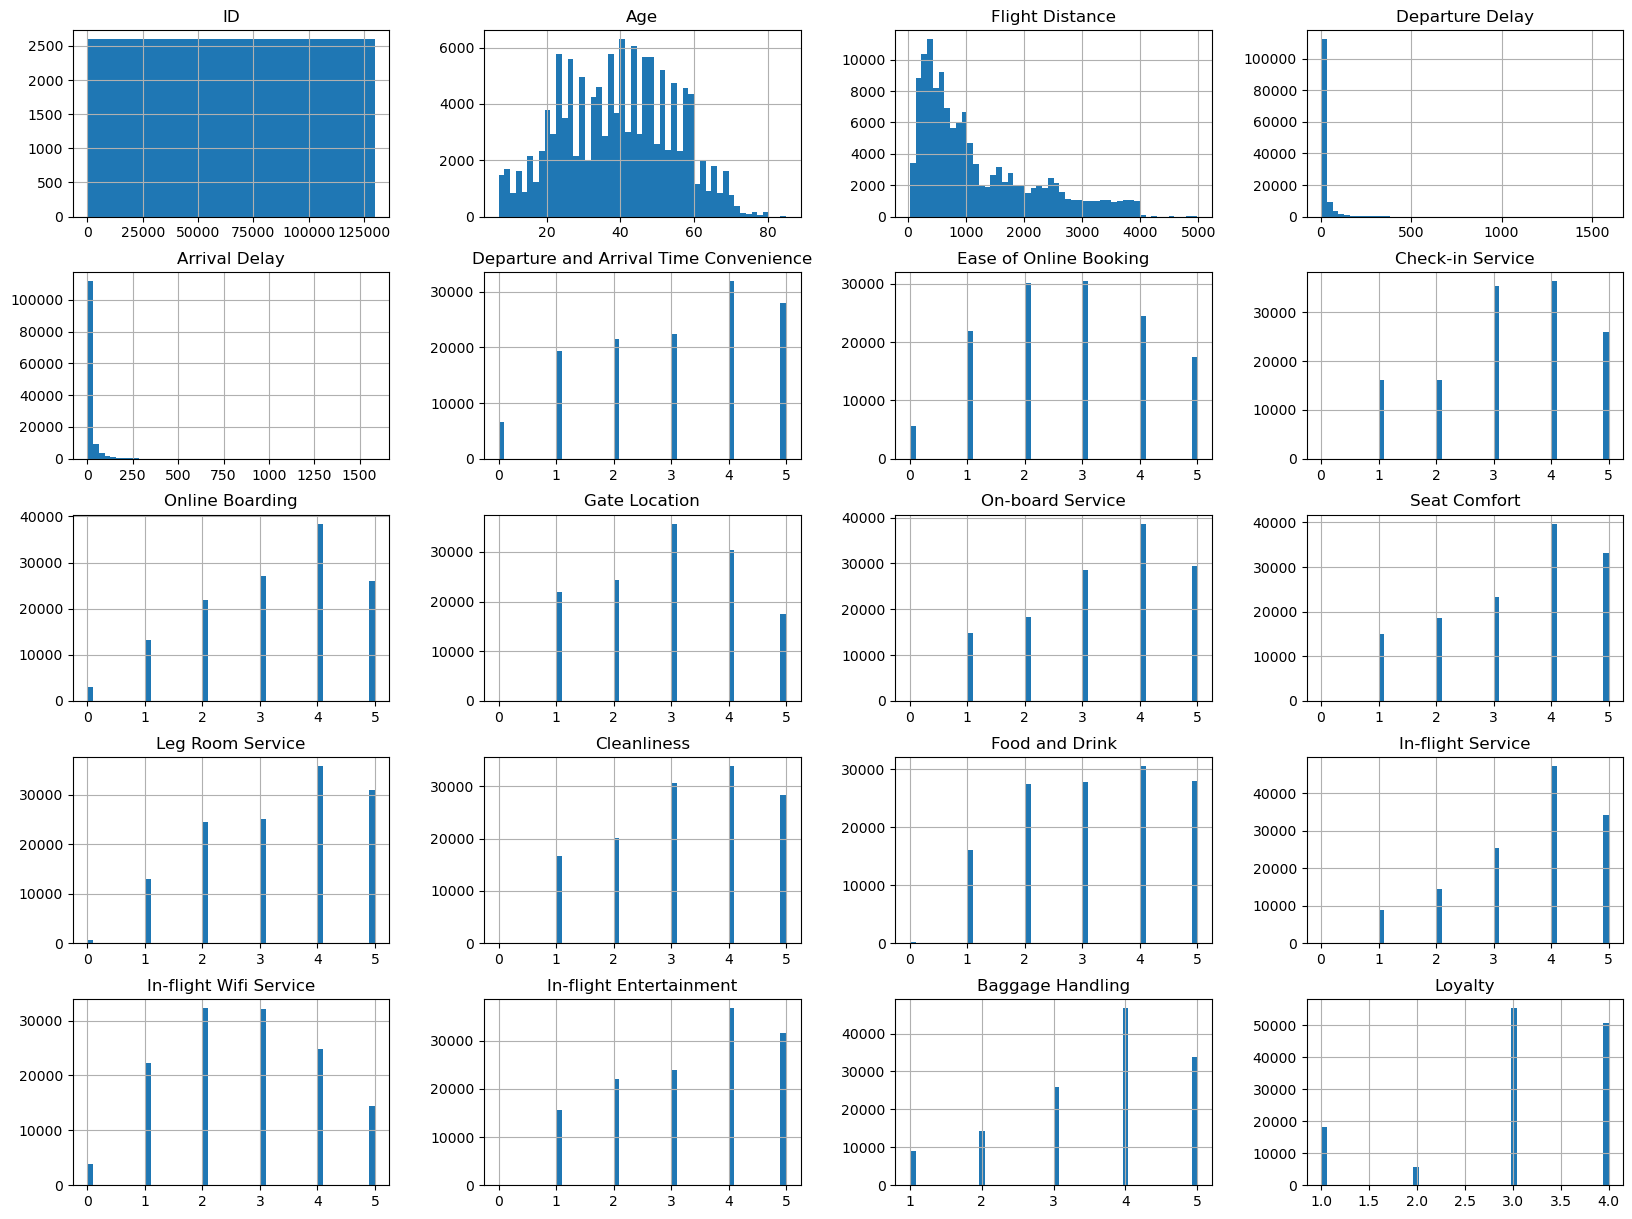

In [5]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
# Drop the ID column
data = data.drop('ID', axis=1)

# Drop Customer Type and Sataisfaction attributes as Loyalty is derived from these two attributes and Satisfaction is the original attribute
data = data.drop('Customer Type', axis=1)
data = data.drop('Satisfaction', axis=1)
data['Loyalty'].value_counts()

Loyalty
3    55372
4    50728
1    18080
2     5700
Name: count, dtype: int64

In [7]:
import seaborn as sns

# Check for unique values in categorical columns to understand distributions
categorical_columns = ['Gender',  'Type of Travel', 'Class']
for col in categorical_columns:
    print(f"{col} unique values:\n", data[col].value_counts(), "\n")


Gender unique values:
 Gender
Female    65899
Male      63981
Name: count, dtype: int64 

Type of Travel unique values:
 Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64 

Class unique values:
 Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64 



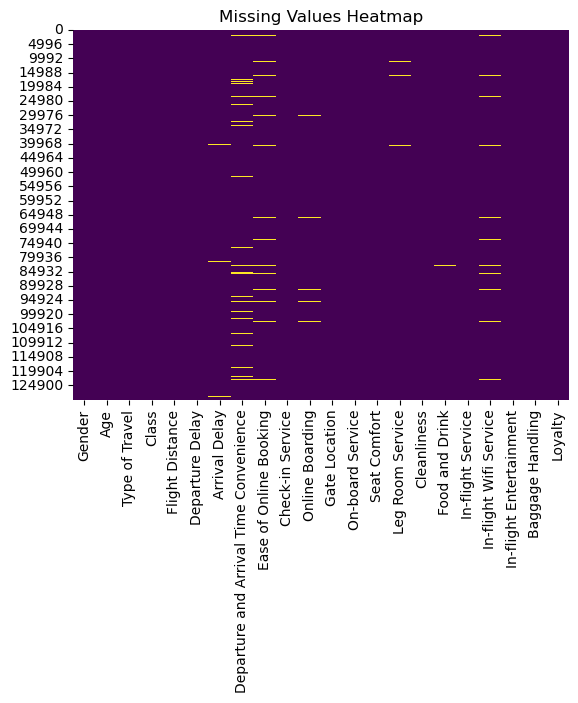

In [8]:
# Replace '0' values with NaN in satisfaction-related columns, as 0 indicates a null/missing survey response.
survey_columns = [
     'Departure and Arrival Time Convenience', 
    'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 
    'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
    'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 
    'In-flight Entertainment', 'Baggage Handling'
]
data[survey_columns] = data[survey_columns].replace(0, np.nan)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

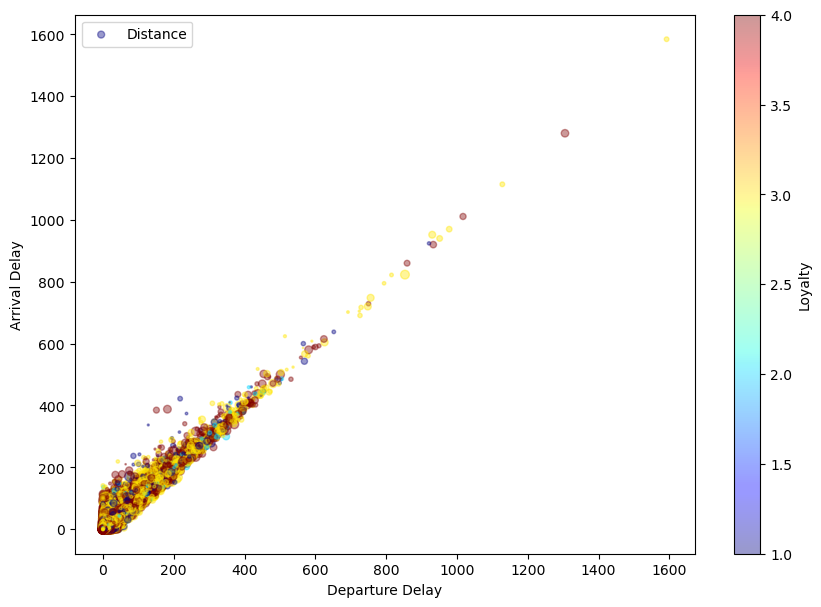

In [9]:
data.plot(kind="scatter", x="Departure Delay", y="Arrival Delay", alpha=0.4,
    s=data["Flight Distance"]/100, label="Distance", figsize=(10,7),
    c="Loyalty", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [10]:
# Check percentage of missing values
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

# Impute missing values based on context: 
# - Median for numeric columns
# - Mode for categorical columns
data = data.dropna(subset=survey_columns)

# Impute missing values: Median for numeric columns, mode for categorical columns
for column in ['Departure Delay', 'Arrival Delay']:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].median())

print("Null values are corrected \n")

Percentage of missing values:
 Gender                                    0.000000
Age                                       0.000000
Type of Travel                            0.000000
Class                                     0.000000
Flight Distance                           0.000000
Departure Delay                           0.000000
Arrival Delay                             0.302587
Departure and Arrival Time Convenience    5.143979
Ease of Online Booking                    4.374808
Check-in Service                          0.000770
Online Boarding                           2.371420
Gate Location                             0.000770
On-board Service                          0.003850
Seat Comfort                              0.000770
Leg Room Service                          0.460425
Cleanliness                               0.010779
Food and Drink                            0.101632
In-flight Service                         0.003850
In-flight Wifi Service                    3.015091


/var/folders/gx/9cn8k5x52gq_wpn2s2w4j2340000gn/T/ipykernel_60420/883713548.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].fillna(data[column].median())


In [11]:
# Check the percentage of missing values after correction
missing_percentage = data.isnull().mean() * 100
print("Percentage of missing values:\n", missing_percentage)

data['Loyalty'].value_counts()

Percentage of missing values:
 Gender                                    0.0
Age                                       0.0
Type of Travel                            0.0
Class                                     0.0
Flight Distance                           0.0
Departure Delay                           0.0
Arrival Delay                             0.0
Departure and Arrival Time Convenience    0.0
Ease of Online Booking                    0.0
Check-in Service                          0.0
Online Boarding                           0.0
Gate Location                             0.0
On-board Service                          0.0
Seat Comfort                              0.0
Leg Room Service                          0.0
Cleanliness                               0.0
Food and Drink                            0.0
In-flight Service                         0.0
In-flight Wifi Service                    0.0
In-flight Entertainment                   0.0
Baggage Handling                          0.0
Loy

Loyalty
3    52808
4    47525
1    15729
2     3505
Name: count, dtype: int64

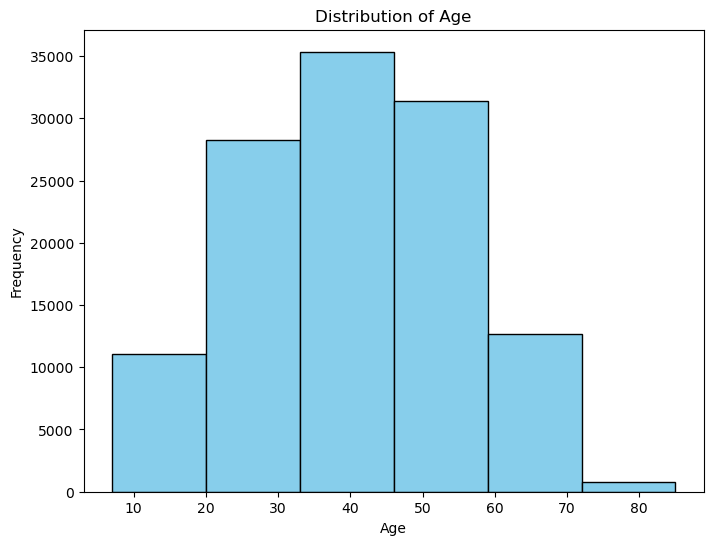

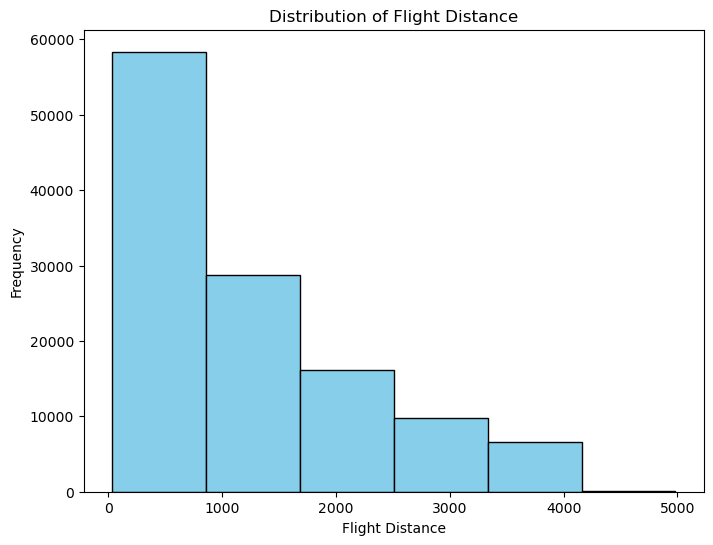

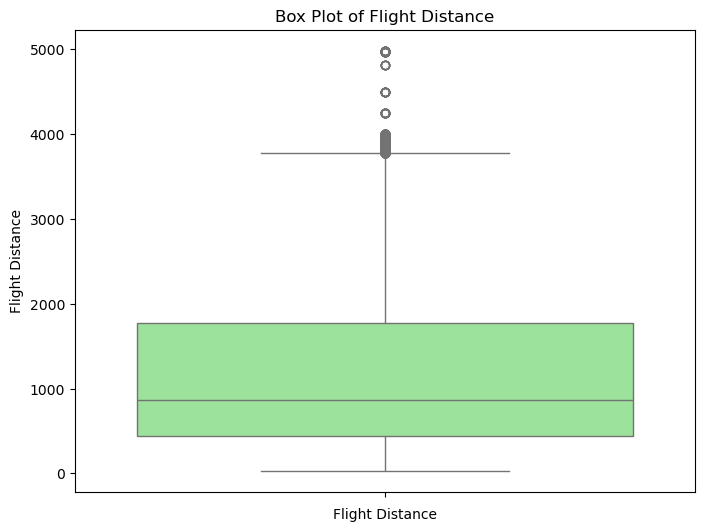

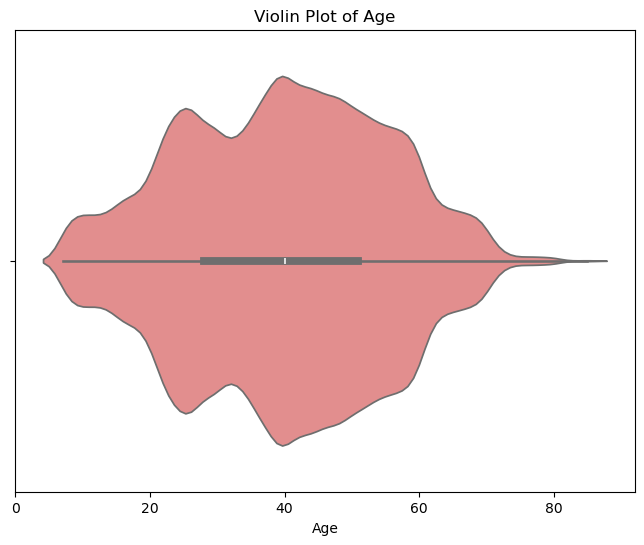

In [12]:

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualizing the distribution of a continuous feature, e.g., 'Age'
plt.figure(figsize=(8, 6))
plt.hist(data['Flight Distance'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Distance')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot of a feature 'Flight Distance'  Box plots can reveal outliers and distribution spread. They are helpful for understanding how data values are dispersed across quartiles.
plt.figure(figsize=(8, 6))
sns.boxplot(data['Flight Distance'], color='lightgreen')
plt.title('Box Plot of Flight Distance')
plt.xlabel('Flight Distance')
plt.show()


# Violin plot for Age Violin plots combine a box plot with a kernel density plot, which is helpful for observing the distribution, especially if it’s multimodal (has multiple peaks).
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Age'], color='lightcoral')
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()





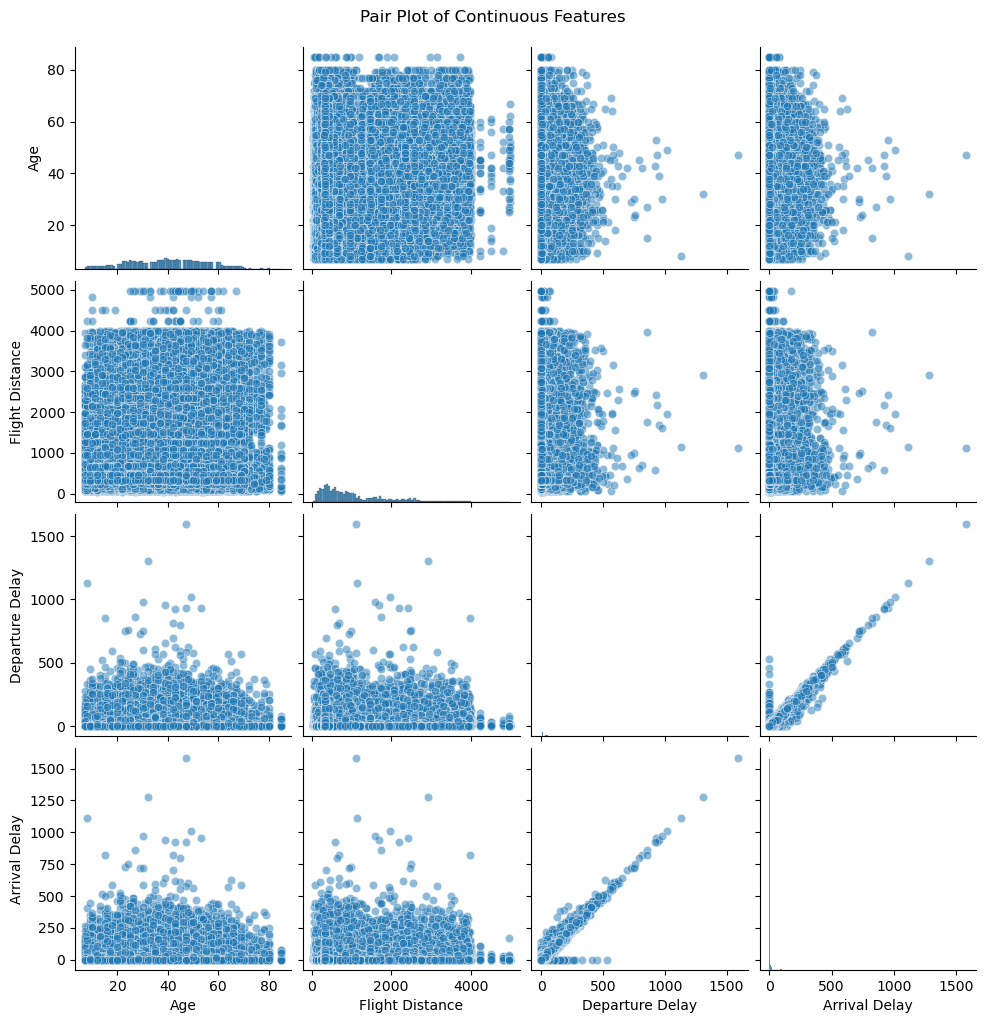

In [13]:
# Pair Plot  If you want to examine multiple features before splitting, a pair plot is a good choice as it shows pairwise relationships and distribution for each feature.


# Subset of continuous variables for pair plot
continuous_features = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']

sns.pairplot(data[continuous_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

In [14]:
#Encoding data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# One-hot encoding - Not going with this as its not helping in correlation and ANN
#data_encoded_1 = pd.get_dummies(data, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'])
# Encoding for all the category columns to ensure that all numbers taken up for maching learning

data.loc[:, categorical_columns] = data[categorical_columns].apply(le.fit_transform)
#categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


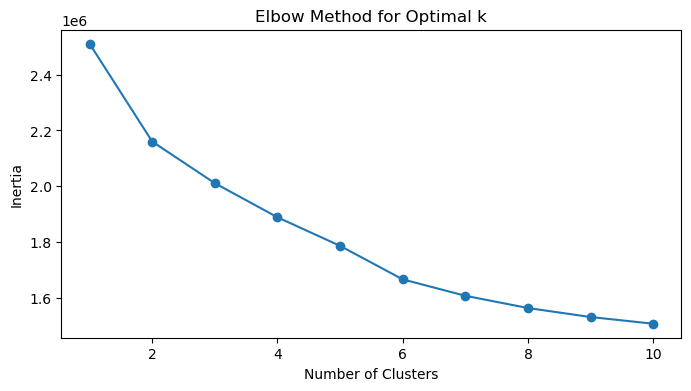

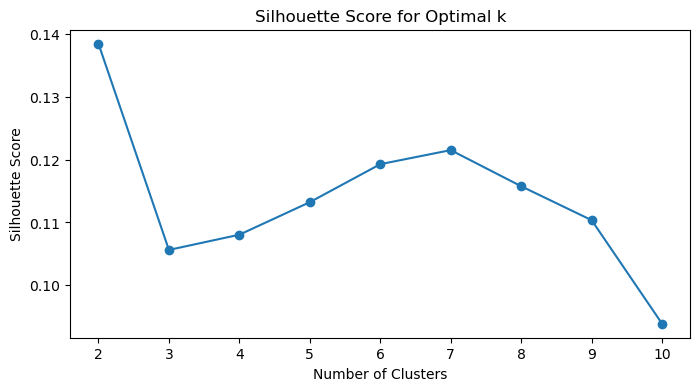

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()



Cluster Profiles:
            Gender        Age Type of Travel     Class  Flight Distance  \
Cluster                                                                  
0        0.515609  34.489343       0.167565   0.77821       991.402520   
1        0.489032  43.753260       0.000989   0.04721      1826.690169   
2        0.528067  43.917921       0.004407  0.011975      2799.427609   
3        0.535732  29.970059       0.655742  1.012568       747.689625   
4        0.607634  32.088208       0.710529  0.925455       801.333276   
5        0.302595  50.921138       0.356589  0.515313      1336.420596   
6        0.490167  39.143921       0.296484  0.624553      1192.814958   
7        0.585652  36.459782       0.148019  1.001966       761.137133   
8        0.464834  41.248157       0.981419  1.070716       789.720055   
9        0.424905  42.839016       0.035599  0.167346       820.577668   

         Departure Delay  Arrival Delay  \
Cluster                                   
0     

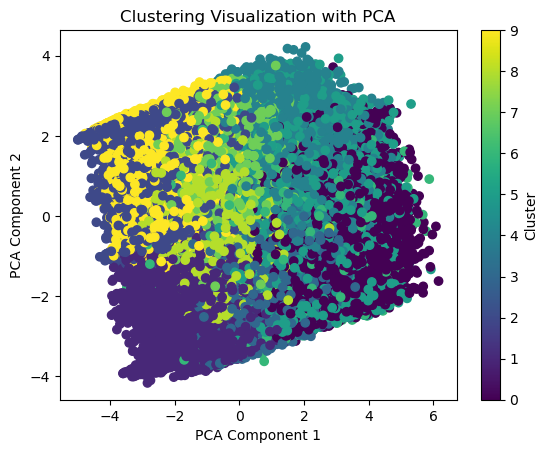

In [16]:
# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 10  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()



In [17]:
pca.explained_variance_ratio_

array([0.19746433, 0.11851955])

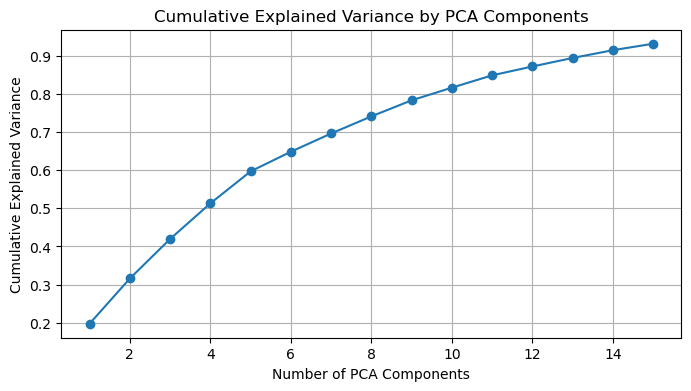

Number of components to retain for ~80% variance: 10


In [18]:
import numpy as np
from sklearn.decomposition import PCA

# Try PCA with more components
pca = PCA(n_components=15)  # Try with 10 components or more if needed
X_pca = pca.fit_transform(X_scaled)

# Calculate and plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Decide on the number of components (e.g., to capture ~80% variance)
n_components_to_retain = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain for ~80% variance: {n_components_to_retain}")

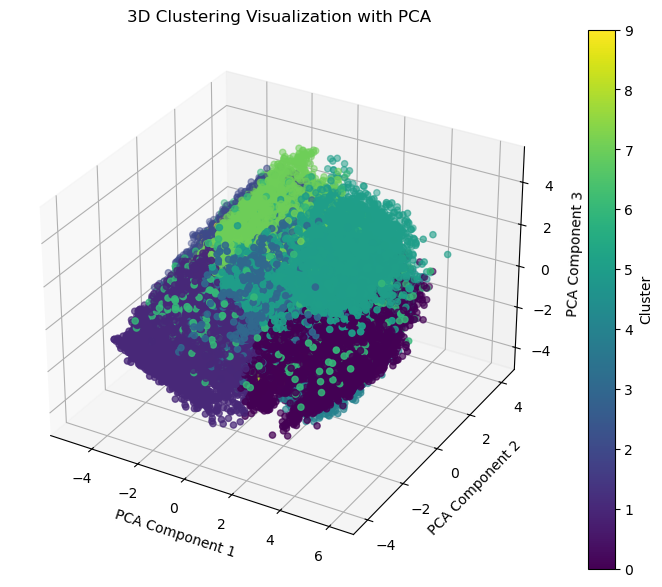

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Use the top 3 PCA components for 3D visualization
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Plot in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=X_original['Cluster'], cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D Clustering Visualization with PCA')
fig.colorbar(scatter, label='Cluster')
plt.show()

In [20]:
pca.explained_variance_ratio_

array([0.19746433, 0.11851945, 0.10357036])

In [21]:
import numpy as np

# Assuming 'pca.explained_variance_ratio_' holds the variance ratios
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_80_percent = np.argmax(cumulative_variance >= 0.80) + 1

print(f"Number of components needed for ~80% variance: {n_components_80_percent}")
print(f"Cumulative explained variance for {n_components_80_percent} components: {cumulative_variance[n_components_80_percent-1]:.2f}")

Number of components needed for ~80% variance: 1
Cumulative explained variance for 1 components: 0.20


In [22]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming 'X_scaled' is the standardized dataset
pca = PCA().fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components_80_percent = np.argmax(cumulative_variance >= 0.80) + 1

# Print detailed results
print(f"Explained Variance Ratio for each component: {explained_variance_ratio}")
print(f"Cumulative Variance for each component: {cumulative_variance}")
print(f"Number of components needed for ~80% variance: {n_components_80_percent}")
print(f"Cumulative explained variance for {n_components_80_percent} components: {cumulative_variance[n_components_80_percent-1]:.2f}")

Explained Variance Ratio for each component: [0.19746433 0.11851955 0.1035706  0.09333183 0.08385168 0.05147719
 0.04779854 0.04489443 0.04206463 0.03317105 0.03231848 0.023218
 0.02232116 0.02035235 0.01692991 0.01663039 0.0149339  0.01389635
 0.01263129 0.00867269 0.00195163]
Cumulative Variance for each component: [0.19746433 0.31598389 0.41955448 0.51288631 0.59673799 0.64821518
 0.69601372 0.74090815 0.78297278 0.81614383 0.84846231 0.87168031
 0.89400147 0.91435382 0.93128374 0.94791413 0.96284803 0.97674438
 0.98937567 0.99804837 1.        ]
Number of components needed for ~80% variance: 10
Cumulative explained variance for 10 components: 0.82


In [23]:
# Fit PCA with 11 components
pca_11 = PCA(n_components=11)
X_pca_11 = pca_11.fit_transform(X_scaled)

print("Shape of transformed data with 11 components:", X_pca_11.shape)

Shape of transformed data with 11 components: (119567, 11)


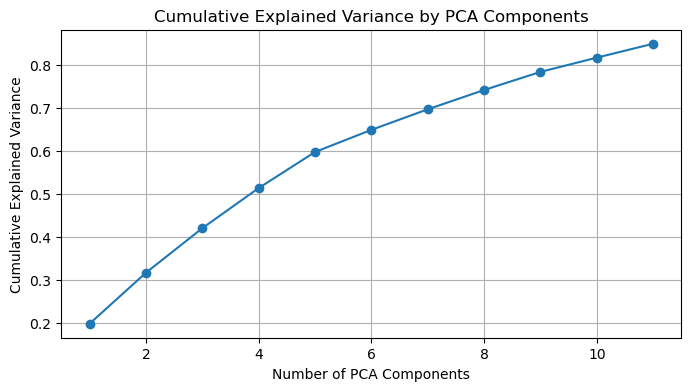

Explained Variance Ratio for each component: [0.19746433 0.11851955 0.1035706  0.09333183 0.08385168 0.05147719
 0.04779854 0.04489443 0.04206463 0.03317105 0.03231848]
Cumulative Variance for 11 components: 0.8484623090278569
Number of components used: 11


In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set PCA to use exactly 11 components to capture ~80% variance
pca = PCA(n_components=11)
X_pca = pca.fit_transform(X_scaled)

# Calculate and plot cumulative explained variance for these 11 components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Verify number of components and cumulative explained variance
print("Explained Variance Ratio for each component:", pca.explained_variance_ratio_)
print("Cumulative Variance for 11 components:", cumulative_variance[-1])
print("Number of components used:", pca.n_components_)

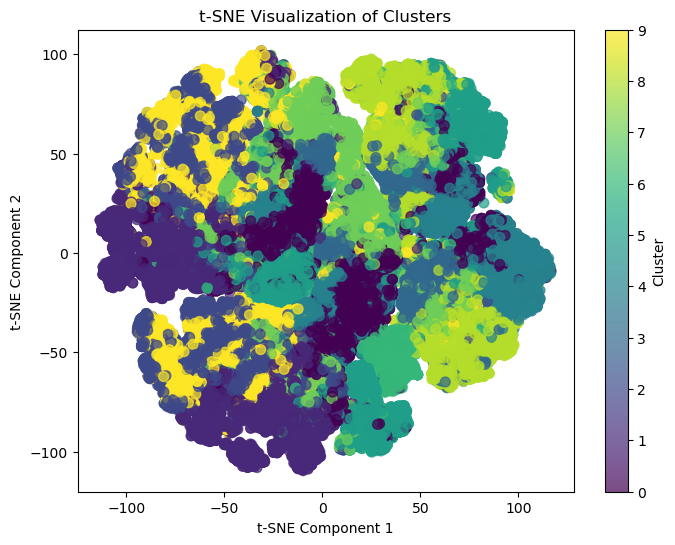

In [25]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_original['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [26]:
print("Cluster range & Innertia scare are", cluster_range, inertia)
print("Silhouette Score" , silhouette_scores)

Cluster range & Innertia scare are range(1, 11) [2510907.0000000037, 2159984.153403648, 2010551.4619185291, 1888336.7972184028, 1785730.906724501, 1665602.9270827614, 1606796.7617220478, 1562824.1404597254, 1530555.5897869407, 1506525.3677664227]
Silhouette Score [0.13846545138386285, 0.10561330710449907, 0.10803902705619879, 0.11322270406849862, 0.11927377283083933, 0.12151584494090356, 0.11575541923187027, 0.11035275663859163, 0.09385555238384821]


Cluster Profiles:
            Gender        Age Type of Travel     Class  Flight Distance  \
Cluster                                                                  
0        0.489638  38.000775        0.45015  0.837956       968.898685   
1        0.495977  39.987552       0.284002  0.514867      1287.437351   
2        0.494904  42.103895       0.152151   0.33898      1486.005729   

         Departure Delay  Arrival Delay  \
Cluster                                   
0              18.186447      18.753233   
1              12.745325      13.015683   
2              12.908500      12.990690   

         Departure and Arrival Time Convenience  Ease of Online Booking  \
Cluster                                                                   
0                                      3.236114                2.733328   
1                                      2.323983                1.946293   
2                                      4.064039                4.011210   

         Check-in 

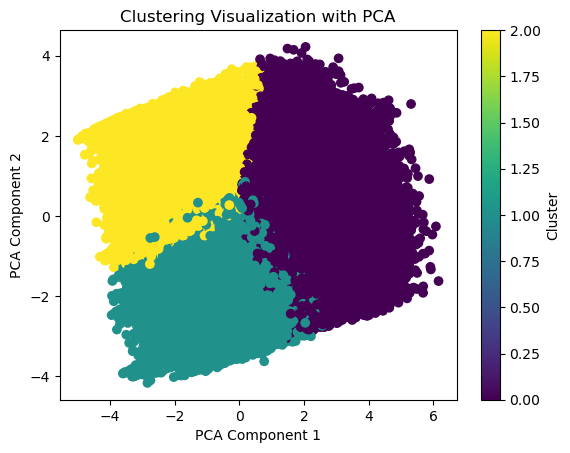

In [27]:


# Step 4: Fit K-Means with the chosen number of clusters
optimal_k = 3  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_original['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

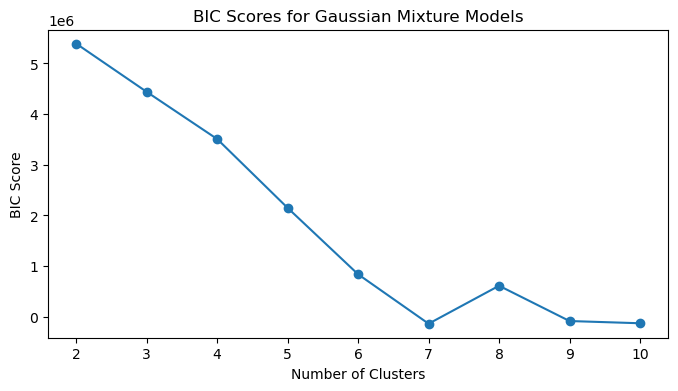

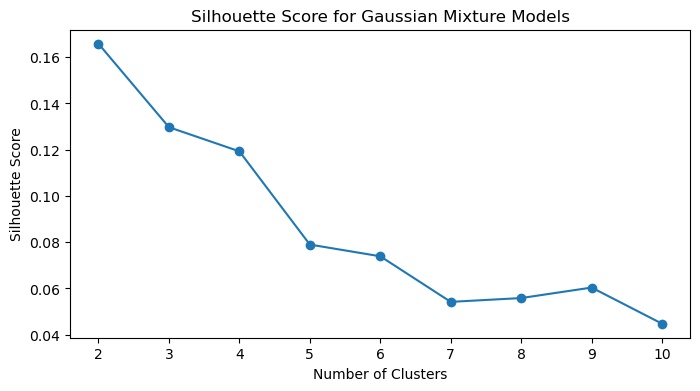

Cluster Profiles:
            Gender        Age Type of Travel     Class  Flight Distance  \
Cluster                                                                  
0        0.585738  33.134680       0.373405  0.802458       916.582620   
1        0.497959  43.451415            0.0       0.0      1848.573733   
2        0.593764  31.833882       0.764387  1.018424       743.230754   
3        0.495193  47.410911            0.0       0.0      1895.855264   
4        0.290286  46.213345       0.710849  0.789605       954.648434   
5        0.321505  49.788434            0.0  0.434752      1405.052556   
6        0.570408  33.786675            0.0  0.807175       997.795413   
7        0.097579  54.763183       0.908989  0.919122       834.112591   
8        0.284855  46.711133       0.679037  0.738549       924.892344   
9        0.488628  38.586635       0.347479  0.674326      1673.617116   

         Departure Delay  Arrival Delay  \
Cluster                                   
0     

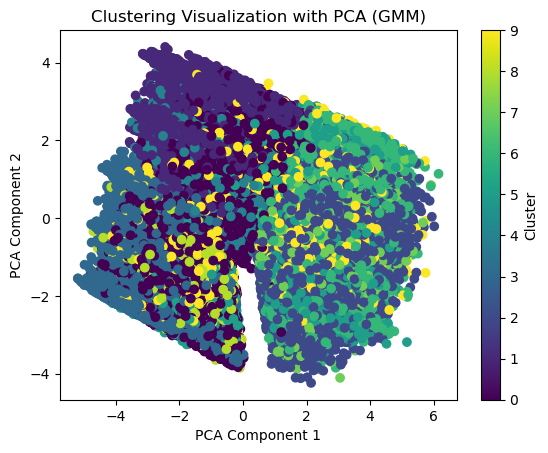

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Determine Optimal Number of Clusters using GMM
# Using Bayesian Information Criterion (BIC) and Silhouette Score
bic_scores = []
silhouette_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))  # BIC score for model evaluation
    silhouette_scores.append(silhouette_score(X_scaled, labels))  # Silhouette score for comparison

# Plot BIC Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, bic_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title('BIC Scores for Gaussian Mixture Models')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Gaussian Mixture Models')
plt.show()

# Step 4: Fit GMM with the chosen number of clusters
optimal_k = 10  # Replace this with the chosen number of clusters based on BIC and Silhouette Score
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
X_original['Cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA (GMM)')
plt.colorbar(label='Cluster')
plt.show()

Cluster Profiles:
            Gender        Age Type of Travel     Class  Flight Distance  \
Cluster                                                                  
0        0.534037  32.859025            0.0  0.795899       905.969838   
1        0.497058  44.105828            0.0       0.0      1853.768778   
2        0.638927  32.881483            1.0  1.076533       778.272372   
3         0.49546  47.588015            0.0       0.0      1899.142405   
4        0.221267  52.148686       0.425295  0.641201      1155.232519   
5        0.543182  32.748933            0.0  0.614306      1025.826509   
6        0.489586  38.525116        0.35653  0.686106      1662.663808   

         Departure Delay  Arrival Delay  \
Cluster                                   
0              13.530043      14.075048   
1              11.181694      11.093310   
2              10.476623      10.615832   
3               9.731826       9.480464   
4              11.390091      11.789888   
5            

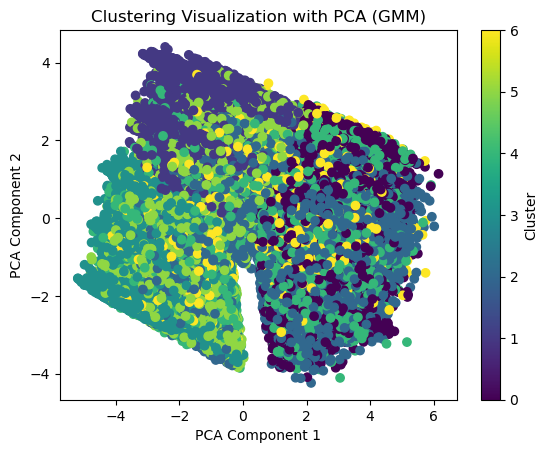

In [29]:
# Step 4: Fit GMM with the chosen number of clusters
optimal_k = 7  # Replace this with the chosen number of clusters based on BIC and Silhouette Score
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
X_original['Cluster'] = gmm.fit_predict(X_scaled)

# Step 5: Analyze Cluster Profiles
cluster_profiles = X_original.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 6: Add Clustering Results to the Original Data
data['Cluster'] = X_original['Cluster']

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_original['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA (GMM)')
plt.colorbar(label='Cluster')
plt.show()

Estimated number of clusters: 6
Estimated number of noise points: 119536
Silhouette Score: -0.24550029823129962
Cluster Profiles:
         Gender        Age Type of Travel Class  Flight Distance  \
Cluster                                                           
0          1.0  53.600000            0.0   0.0            493.4   
1          1.0  53.666667            0.0   0.0           2607.0   
2          1.0  44.200000            0.0   0.0            574.4   
3          1.0  45.400000            0.0   0.0           1658.2   
4          0.0  43.400000            0.0   0.0            919.2   
5          1.0  56.800000            0.0   0.0            594.8   

         Departure Delay  Arrival Delay  \
Cluster                                   
0               1.200000            2.4   
1               0.166667            0.0   
2               0.000000            1.2   
3               1.800000            0.2   
4               2.200000            0.0   
5               4.400000       

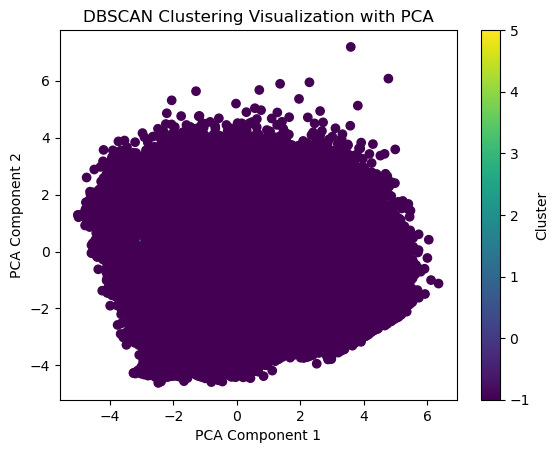

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Remove 'Loyalty' from the dataset
X_original = data.drop(columns=['Loyalty'])

# Step 2: Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Step 3: Implement DBSCAN and evaluate clusters
# Set parameters for DBSCAN
eps_value = 0.5  # Adjust based on data
min_samples_value = 5  # Adjust based on data

# Fit DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
labels = dbscan.fit_predict(X_scaled)

# Calculate the number of clusters (excluding noise, which is labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate Silhouette Score if there are more than one clusters
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Silhouette Score: Not applicable (only one cluster found)")

# Step 4: Add Clustering Results to the Original Data
X_original['Cluster'] = labels
data['Cluster'] = labels

# Step 5: Analyze Cluster Profiles (ignoring noise points if present)
cluster_profiles = X_original[X_original['Cluster'] != -1].groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Visualize clustering results using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

Cluster Centers (Bin Centers): [11.81344134 21.20863964 27.37692837 33.70271112 39.05477973 43.49798175
 47.96528513 53.41789216 59.36972944 68.04456217]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


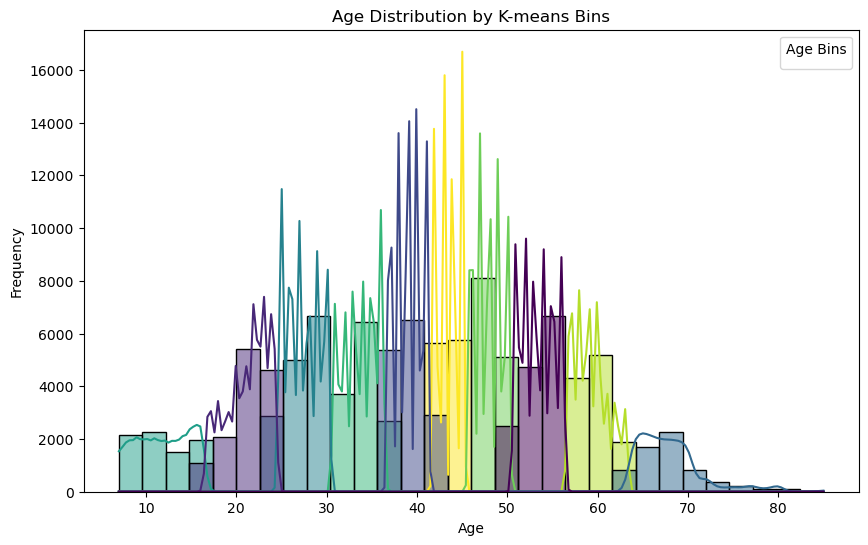

In [31]:
#Binning logic applied to bin attributes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Kmean of age
ages = data['Age'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with  clusters
kmeans = KMeans(n_clusters=10, random_state=0)
data['Age_bins'] = kmeans.fit_predict(ages)

# Get the cluster centers (these represent the bin centroids)
centroids = np.sort(kmeans.cluster_centers_.flatten())
print("Cluster Centers (Bin Centers):", centroids)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Age_bins', palette='viridis', bins=30, kde=True)
plt.title('Age Distribution by K-means Bins')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Age Bins')
plt.show()

flightDist = data['Flight Distance'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Flight Distance'] = kmeans.fit_predict(flightDist)

departDelay = data['Departure Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Departure Delay'] = kmeans.fit_predict(departDelay)

arrivDelay = data['Arrival Delay'].values.reshape(-1, 1)  # Reshaping for KMeans, which expects a 2D array
# Applying KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
data['Arrival Delay '] = kmeans.fit_predict(arrivDelay)



Data types of each column:
 Gender                                     object
Age                                         int64
Type of Travel                             object
Class                                      object
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainmen

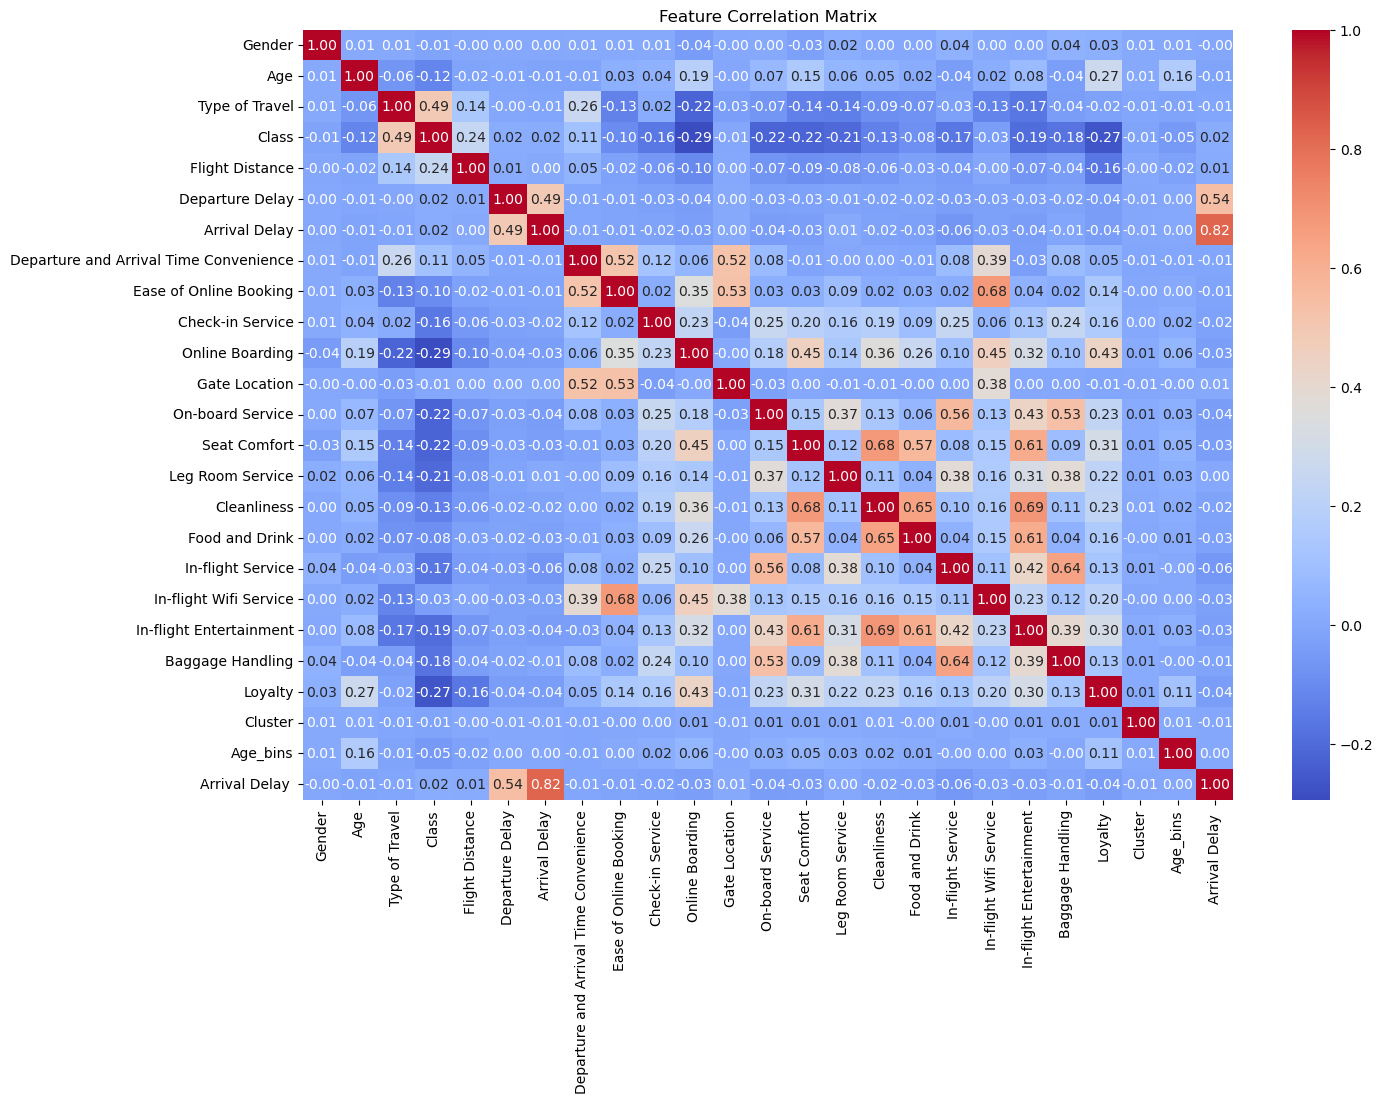

In [32]:
print("Data types of each column:\n", data.dtypes)

# 2. Select only numeric columns
numeric_data = data

# 3. Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [33]:
#from sklearn.preprocessing import StandardScaler

# Scale numerical columns
#numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
#scaler = StandardScaler()
#data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify scaling
#data.describe()

In [34]:
data.head()


# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Age_bins                                  0.112592
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038596
Arrival Delay                  

In [35]:
data['Comfort'] = ( data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking']) / 3
data['Onboarding Convenience'] = (  data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service'] +  data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking']) / 3
data['Total Delay'] = data['Departure Delay'] + data['Arrival Delay']
data['Total Comfort'] = ( data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment']  + data['Ease of Online Booking']) 
data['Total Onboarding Convenience'] = (  data['Ease of Online Booking'] + data['Check-in Service'] + data['Online Boarding'] + data['On-board Service'] +  data['Seat Comfort'] + data['Leg Room Service'] + data['Cleanliness'] + data['In-flight Entertainment'] + data['Ease of Online Booking'])


survey_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 
    'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling'
]
data['Total Survey Score'] = data[survey_columns].sum(axis=1)

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)



Loyalty                                   1.000000
Online Boarding                           0.433505
Total Onboarding Convenience              0.426128
Onboarding Convenience                    0.426128
Total Survey Score                        0.374840
Comfort                                   0.372408
Total Comfort                             0.372408
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling               

In [36]:
data.head()

df = pd.DataFrame(data)

# List of columns to convert to integers
columns_to_convert = ['Gender','Type of Travel','Class']

# Convert specified columns to integers
for column in columns_to_convert:
    data[column] = df[column].astype(int)

# Check the updated DataFrame
print(data.dtypes)

Gender                                      int64
Age                                         int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int32
Departure Delay                             int32
Arrival Delay                             float64
Departure and Arrival Time Convenience    float64
Ease of Online Booking                    float64
Check-in Service                          float64
Online Boarding                           float64
Gate Location                             float64
On-board Service                          float64
Seat Comfort                              float64
Leg Room Service                          float64
Cleanliness                               float64
Food and Drink                            float64
In-flight Service                         float64
In-flight Wifi Service                    float64
In-flight Entertainment                   float64


In [37]:
import pandas as pd
import numpy as np
from itertools import combinations

# Separate target column and drop it from the feature set
target = data['Loyalty']
X = data.drop(columns=['Loyalty'])

# Identify numeric features
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

# List to hold interaction features
interaction_features_list = []

# Create interaction terms
for feature1, feature2 in combinations(numeric_features, 2):
    interaction_feature = X[feature1] * X[feature2]
    interaction_feature_name = f'{feature1}_x_{feature2}'
    interaction_features_list.append(interaction_feature.rename(interaction_feature_name))

# Combine original features with interaction features
interaction_features = pd.concat(interaction_features_list, axis=1)
X_with_interactions = pd.concat([X, interaction_features], axis=1)

# Add the target column back to the DataFrame
X_with_interactions['Loyalty'] = target

# Display the DataFrame with interaction features
print("DataFrame with Interaction Features:")
print(X_with_interactions)

# Evaluate correlations with target variable
correlation_matrix = X_with_interactions.corr()
print("\nCorrelation with Loyalty:")
print(correlation_matrix['Loyalty'].sort_values(ascending=False))

DataFrame with Interaction Features:
        Gender  Age  Type of Travel  Class  Flight Distance  Departure Delay  \
0            1   48               0      0                1                0   
1            0   35               0      0                1                0   
2            1   41               0      0                1                0   
3            1   50               0      0                0                0   
4            0   49               0      0                2                0   
...        ...  ...             ...    ...              ...              ...   
129875       1   28               1      2                3                0   
129876       1   41               1      2                3                0   
129877       1   42               1      2                3                0   
129878       1   50               1      2                3                3   
129879       0   20               1      2                3                0   

  

In [38]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_cleaned = data.drop(columns=['Loyalty'])
y_cleaned = data['Loyalty']

# Backward Elimination Function with Multicollinearity Check
def backward_elimination(X, y, significance_level=0.01):
    X_with_constant = sm.add_constant(X)
    model = sm.OLS(y, X_with_constant).fit()
    
    while True:
        # Check p-values
        p_values = model.pvalues[1:]  # Exclude constant
        max_p_value = p_values.max()
        
        # If p-value is too high, remove the feature with highest p-value
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X = X.drop(columns=[feature_to_remove])
            X_with_constant = sm.add_constant(X)
            model = sm.OLS(y, X_with_constant).fit()
        else:
            break

    return X.columns.tolist(), model

# Run backward elimination
selected_features_backward, final_model = backward_elimination(X_cleaned, y_cleaned)
print("Selected features using Backward Elimination:", selected_features_backward, final_model)

# Optional: Check for Multicollinearity in Selected Features
def check_multicollinearity(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_result = check_multicollinearity(X_cleaned[selected_features_backward])
print("VIF for selected features:\n", vif_result)

Selected features using Backward Elimination: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Age_bins', 'Comfort', 'Onboarding Convenience', 'Total Delay', 'Total Comfort', 'Total Onboarding Convenience', 'Total Survey Score'] <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x3395a7350>
VIF for selected features:
                                    feature           VIF
0                                   Gender  1.957493e+00
1                                      Age  7.942006e+00
2                           Type of Travel  2.262257e+00
3                                    Class  2.689657e+00
4             

In [39]:
def reduce_multicollinearity(X, threshold=10.0):
    while True:
        vif = pd.DataFrame()
        vif["feature"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        # Identify the feature with the highest VIF above the threshold
        max_vif = vif["VIF"].max()
        if max_vif > threshold:
            feature_to_drop = vif.loc[vif["VIF"].idxmax(), "feature"]
            print(f"Dropping {feature_to_drop} with VIF={max_vif}")
            X = X.drop(columns=[feature_to_drop])
        else:
            break
    
    return X

# Reduce multicollinearity in selected features
X_reduced = reduce_multicollinearity(X_cleaned[selected_features_backward])

# Run backward elimination on reduced set of features
selected_features_reduced, final_model_reduced = backward_elimination(X_reduced, y_cleaned)
print("Selected features after VIF reduction and Backward Elimination:", selected_features_reduced)

Dropping Departure Delay with VIF=90764525879.87335
Dropping Onboarding Convenience with VIF=183585115.5151426
Dropping Total Comfort with VIF=327548430.2293636
Dropping In-flight Wifi Service with VIF=816937880.7847611


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Ease of Online Booking with VIF=inf


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping Check-in Service with VIF=inf
Dropping Total Survey Score with VIF=3177.9264548224282
Dropping Total Delay with VIF=2483.720809857688
Dropping Comfort with VIF=1152.1536015817271
Dropping Total Onboarding Convenience with VIF=206.94408835516205
Dropping In-flight Entertainment with VIF=25.516868774933478
Dropping In-flight Service with VIF=20.700637583414927
Dropping Seat Comfort with VIF=17.51153226345731
Dropping Baggage Handling with VIF=14.850287494305814
Dropping Cleanliness with VIF=13.553734402876131
Dropping Departure and Arrival Time Convenience with VIF=10.116198777722254
Selected features after VIF reduction and Backward Elimination: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Arrival Delay', 'Online Boarding', 'On-board Service', 'Leg Room Service', 'Food and Drink', 'Age_bins']


In [40]:

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Total Onboarding Convenience              0.426128
Onboarding Convenience                    0.426128
Total Survey Score                        0.374840
Comfort                                   0.372408
Total Comfort                             0.372408
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Flight Distance                           0.163602
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling               

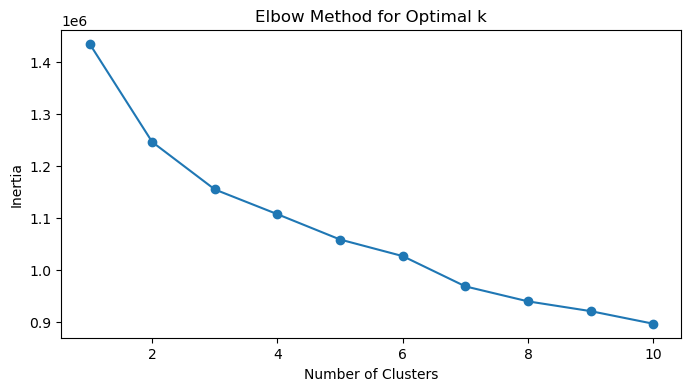

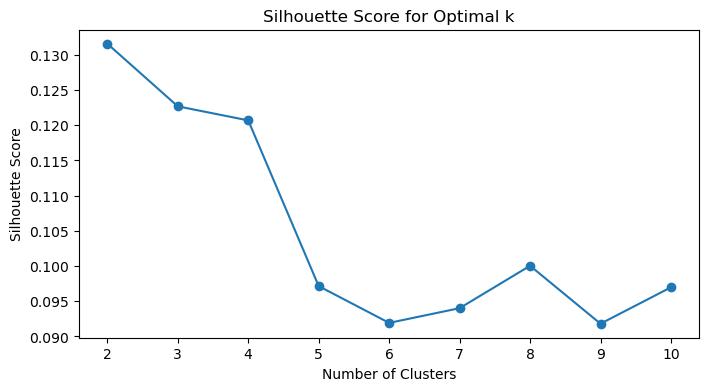

Cluster Profiles:
            Gender        Age  Type of Travel     Class  Flight Distance  \
Cluster                                                                   
0        0.490349  55.196171        0.908305  1.100750         2.158448   
1        0.495702  43.665809        0.003385  0.085787         1.435863   
2        0.508301  23.386404        0.970859  1.068488         2.065086   
3        0.483410  35.973362        0.001794  0.664412         2.004638   

         Arrival Delay  Online Boarding  Gate Location  On-board Service  \
Cluster                                                                    
0            13.522380         3.302820       2.912962          3.140699   
1            12.181051         4.125409       2.972653          4.199305   
2            15.384678         2.537290       2.916485          3.408489   
3            19.813200         2.804229       3.082261          2.510241   

         Leg Room Service  Food and Drink  Age_bins  
Cluster            

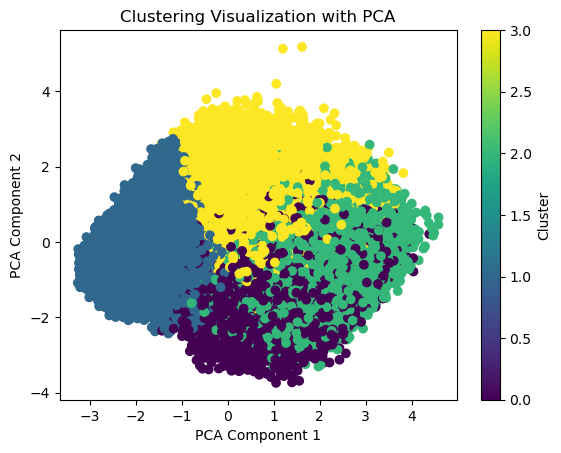

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the Data (assuming X_reduced from previous steps)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Step 2: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Step 3: Fit K-Means with the chosen number of clusters (choose based on elbow or silhouette score)
optimal_k = 4  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze Cluster Profiles
cluster_profiles = X_reduced.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 5: Add Clustering Results to the Data
data['Cluster'] = X_reduced['Cluster']  # Adding cluster labels to the original data for further analysis

# Optional: Visualize clustering results if using PCA or TSNE for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_reduced['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

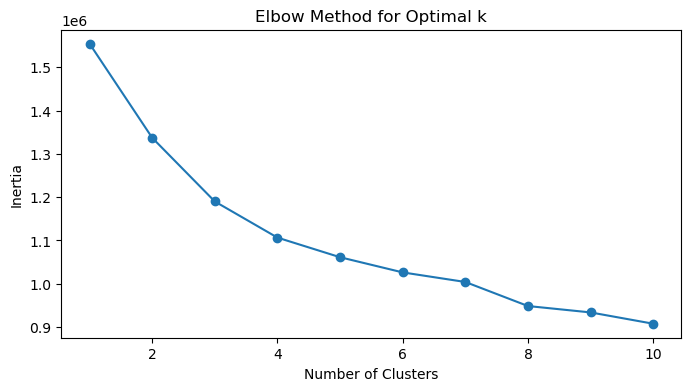

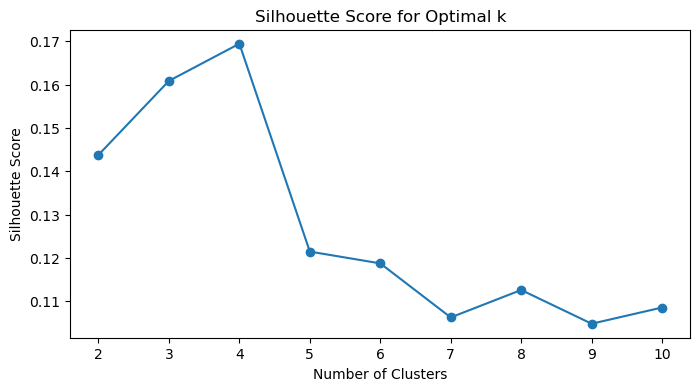

Cluster Profiles:
            Gender        Age  Type of Travel     Class  Flight Distance  \
Cluster                                                                   
0        0.493218  44.045437        0.007654  0.142220         2.683588   
1        0.487937  38.818552        0.275909  0.611621         1.836222   
2        0.498605  39.106567        0.003474  0.542063         1.908868   
3        0.499819  41.478544        0.009506  0.080844         0.393174   
4        0.490956  55.211524        0.925864  1.102459         2.152930   
5        0.467260  32.347230        0.000227  0.811487         2.106718   
6        0.509421  23.352461        0.996726  1.061302         2.068925   
7        0.496015  42.485474        0.008313  0.085697         1.431485   
8        0.494105  47.040865        0.006028  0.093609         1.373017   

         Arrival Delay  Online Boarding  Gate Location  On-board Service  \
Cluster                                                                    
0  

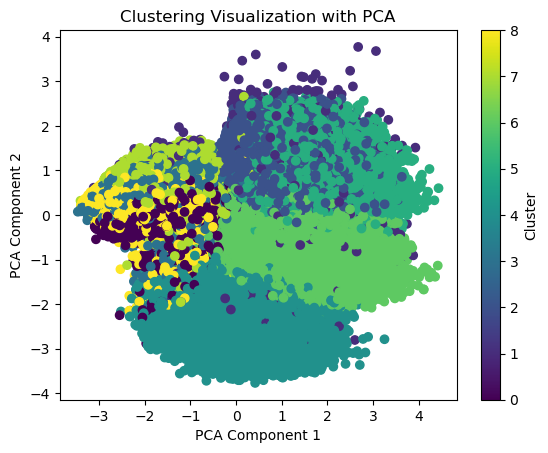

In [42]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Standardize the Data (assuming X_reduced from previous steps)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Step 2: Determine Optimal Number of Clusters
# Using the Elbow Method
inertia = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Using the Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Step 3: Fit K-Means with the chosen number of clusters (choose based on elbow or silhouette score)
optimal_k = 9  # Replace this with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X_reduced['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Analyze Cluster Profiles
cluster_profiles = X_reduced.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

# Step 5: Add Clustering Results to the Data
data['Cluster'] = X_reduced['Cluster']  # Adding cluster labels to the original data for further analysis

# Optional: Visualize clustering results if using PCA or TSNE for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_reduced['Cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering Visualization with PCA')
plt.colorbar(label='Cluster')
plt.show()

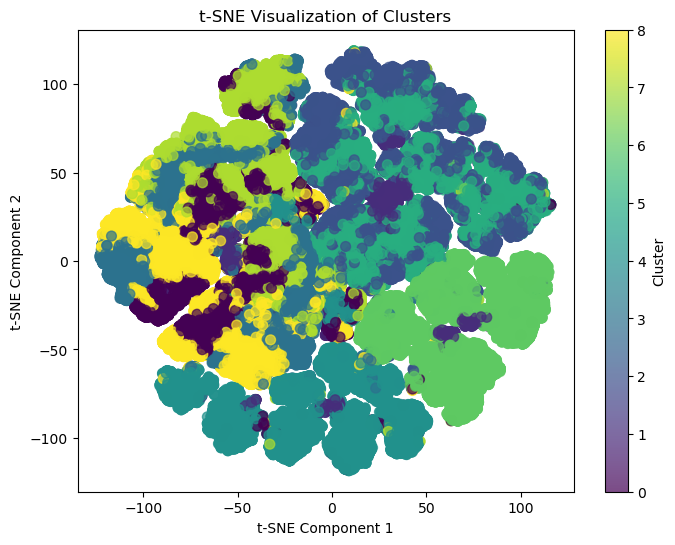

In [43]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X_reduced['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()